#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 10
**CH10B Finding a good deal among hotels with multiple regression**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [2]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from mizani.formatters import percent_format
from plotnine import *
from stargazer import stargazer
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold
from math import sqrt
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [3]:
hotels = pd.read_csv(os.path.join("/workspaces/codespaces-jupyter/data/hotels-vienna.csv"))

In [5]:
hotels.columns

Index(['country', 'city_actual', 'rating_count', 'center1label',
       'center2label', 'neighbourhood', 'price', 'city', 'stars', 'ratingta',
       'ratingta_count', 'scarce_room', 'hotel_id', 'offer', 'offer_cat',
       'year', 'month', 'weekend', 'holiday', 'distance', 'distance_alter',
       'accommodation_type', 'nnights', 'rating'],
      dtype='object')

In [11]:
hotels

,country,city_actual,rating_count,center1label,center2label,neighbourhood,price,city,stars,ratingta,...,distance_alter,accommodation_type,nnights,rating,high_rating,high_stars,high_price,long_distance,low_price,low_rating
0,Austria,Vienna,36.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,4.5,...,4.4,Apartment,1,4.4,False,True,False,False,False,False
1,Austria,Vienna,189.0,City centre,Donauturm,17. Hernals,81,Vienna,4.0,3.5,...,3.8,Hotel,1,3.9,False,True,False,False,False,False
2,Austria,Vienna,53.0,City centre,Donauturm,Alsergrund,85,Vienna,4.0,3.5,...,2.5,Hotel,1,3.7,False,True,False,False,False,False
3,Austria,Vienna,55.0,City centre,Donauturm,Alsergrund,83,Vienna,3.0,4.0,...,2.5,Hotel,1,4.0,False,False,False,False,False,False
4,Austria,Vienna,33.0,City centre,Donauturm,Alsergrund,82,Vienna,4.0,3.5,...,2.8,Hotel,1,3.9,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Austria,Vienna,2.0,City centre,Donauturm,Wieden,109,Vienna,3.0,3.0,...,3.8,Apartment,1,5.0,True,False,False,False,False,False
424,Austria,Vienna,145.0,City centre,Donauturm,Wieden,185,Vienna,5.0,4.0,...,3.6,Hotel,1,4.3,False,True,True,False,False,False
425,Austria,Vienna,112.0,City centre,Donauturm,Wieden,100,Vienna,4.0,4.5,...,3.7,Hotel,1,4.4,False,True,False,False,False,False
426,Austria,Vienna,169.0,City centre,Donauturm,Wieden,58,Vienna,3.0,3.0,...,4.1,Hotel,1,3.2,False,False,False,False,False,False


In [6]:
hotels.describe()

,rating_count,price,stars,ratingta,ratingta_count,scarce_room,hotel_id,offer,year,month,weekend,holiday,distance,distance_alter,nnights,rating
count,393.000000,428.000000,428.000000,325.000000,325.000000,428.000000,428.000000,428.000000,428.0,428.0,428.0,428.0,428.000000,428.000000,428.0,393.000000
mean,155.048346,131.366822,3.434579,3.990769,556.516923,0.598131,22153.502336,0.679907,2017.0,11.0,0.0,0.0,1.658879,3.718458,1.0,3.970992
std,191.217435,91.580545,0.772278,0.482638,586.874582,0.490850,146.858477,0.467058,0.0,0.0,0.0,0.0,1.595673,1.631341,0.0,0.577444
min,1.000000,27.000000,1.000000,2.000000,2.000000,0.000000,21894.000000,0.000000,2017.0,11.0,0.0,0.0,0.000000,0.600000,1.0,1.000000
25%,27.000000,83.000000,3.000000,3.500000,129.000000,0.000000,22027.750000,0.000000,2017.0,11.0,0.0,0.0,0.700000,2.700000,1.0,3.700000
50%,84.000000,109.500000,3.500000,4.000000,335.000000,1.000000,22155.500000,1.000000,2017.0,11.0,0.0,0.0,1.300000,3.400000,1.0,4.000000
75%,203.000000,146.000000,4.000000,4.500000,811.000000,1.000000,22279.250000,1.000000,2017.0,11.0,0.0,0.0,2.000000,4.400000,1.0,4.400000
max,1541.000000,1012.000000,5.000000,5.000000,3171.000000,1.000000,22409.000000,1.000000,2017.0,11.0,0.0,0.0,13.000000,13.000000,1.0,5.000000


In [59]:
hotels["rating"].fillna(0, inplace=True)

In [60]:
hotels["rating"].unique()

array([4.4, 3.9, 3.7, 4. , 4.8, 4.6, 3.5, 0. , 4.1, 4.5, 2.7, 4.3, 3. ,
       3.2, 1. , 2. , 3.4, 5. , 2.5, 2.2, 4.9])

In [61]:
hotels["high_rating"] = hotels["rating"] >= 4.5
hotels["low_rating"] = hotels["rating"] < 3
hotels["medium_rating"] = (hotels["rating"] >= 3) & (hotels["rating"] < 4.5)

hotels["high_stars"] = hotels["stars"] >= 4
hotels["long_distance"] = hotels["distance"] >= 10

hotels["city_center"]=np.where (hotels["center1label"] == "City centre", 1, 0)
hotels["vienna"] = np.where (hotels["city_actual"] == "Vienna", 1, 0)


hotels["hotel_type"] = np.where (hotels["accommodation_type"] == "Hotel", 1, 0)
hotels["apartment_type"] = np.where (hotels["accommodation_type"] == "Apartment", 1, 0)
hotels["BB_type"] = np.where (hotels["accommodation_type"] == "Bed and breakfast", 1, 0)
hotels["hostel_type"] = np.where (hotels["accommodation_type"] == "Hostel", 1, 0)


hotels["distancesq"] = hotels["distance"] ** 2
hotels['ratingsq'] = hotels['rating'] ** 2



In [75]:
# dropping hotels with price > 400
hotels = hotels[hotels["price"] <= 400]

In [74]:
len(hotels)

421

In [76]:
model1 = smf.ols("price ~ distance + distancesq", data=hotels).fit(cov_type="HC1")
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     23.35
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           2.44e-10
Time:                        19:01:53   Log-Likelihood:                -2295.6
No. Observations:                 421   AIC:                             4597.
Df Residuals:                     418   BIC:                             4609.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    153.6085      6.240     24.617      0.0

In [77]:
model2 = smf.ols("price ~ distance + distancesq + rating", data=hotels).fit(cov_type="HC1")
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     15.62
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           1.21e-09
Time:                        19:01:53   Log-Likelihood:                -2295.0
No. Observations:                 421   AIC:                             4598.
Df Residuals:                     417   BIC:                             4614.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.4648     13.824     11.752      0.0

In [78]:
model3 = smf.ols("price ~ distance + distancesq + rating + ratingsq + vienna + high_rating + medium_rating + low_rating", data=hotels).fit(cov_type="HC1")
print(model3.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     351.6
Date:                Tue, 29 Jul 2025   Prob (F-statistic):          4.65e-179
Time:                        19:01:53   Log-Likelihood:                -2257.2
No. Observations:                 421   AIC:                             4530.
Df Residuals:                     413   BIC:                             4563.
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               144.09

In [79]:
model4 = smf.ols("price ~ distance + distancesq + rating + ratingsq + vienna + high_rating + medium_rating + low_rating + city_center + high_stars + long_distance + hotel_type + apartment_type + BB_type + hostel_type", data=hotels).fit(cov_type="HC1")
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 29 Jul 2025   Prob (F-statistic):          1.85e-194
Time:                        19:01:53   Log-Likelihood:                -2221.0
No. Observations:                 421   AIC:                             4470.
Df Residuals:                     407   BIC:                             4527.
Df Model:                          13                                         
Covariance Type:                  HC1                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                45.70

In [80]:
model5= smf.ols("price ~ distance + distancesq + rating + ratingsq + vienna * distance + high_rating * distance + medium_rating * distance + low_rating * distance + city_center * distance+ high_stars* distance + long_distance* distance + hotel_type* distance + apartment_type * distance+ BB_type * distance+ hostel_type* distance", data=hotels).fit(cov_type="HC1")

model_equations = [model1, model2, model3, model4, model5]

print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     342.7
Date:                Tue, 29 Jul 2025   Prob (F-statistic):          4.65e-243
Time:                        19:01:53   Log-Likelihood:                -2203.6
No. Observations:                 421   AIC:                             4453.
Df Residuals:                     398   BIC:                             4546.
Df Model:                          22                                         
Covariance Type:                  HC1                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [81]:
hotels["rating"].unique()

array([4.4, 3.9, 3.7, 4. , 4.8, 4.6, 3.5, 0. , 4.1, 4.5, 2.7, 4.3, 3. ,
       3.2, 1. , 2. , 3.4, 5. , 2.5, 2.2, 4.9])

In [82]:
k_fold = 10

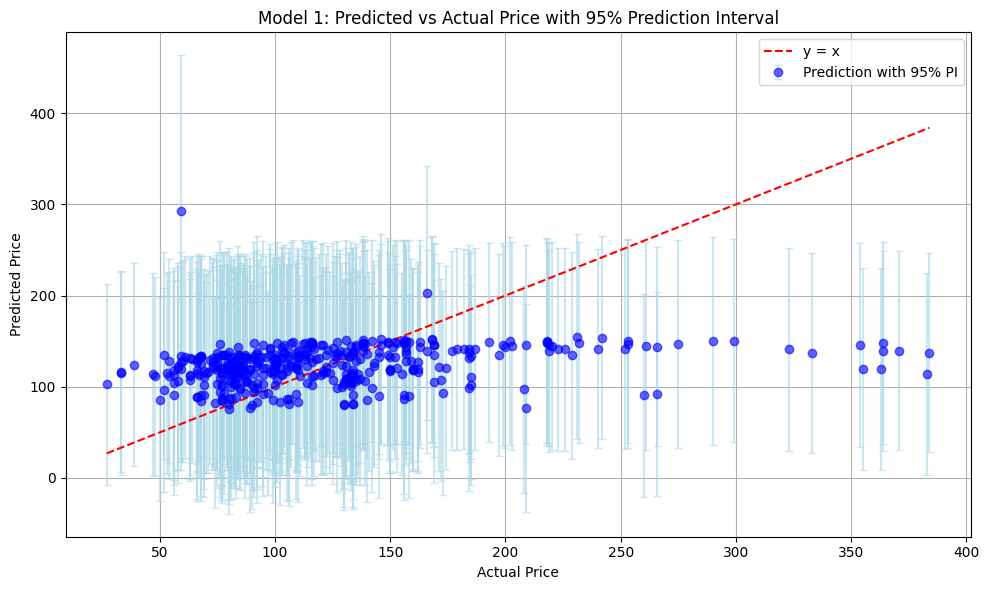

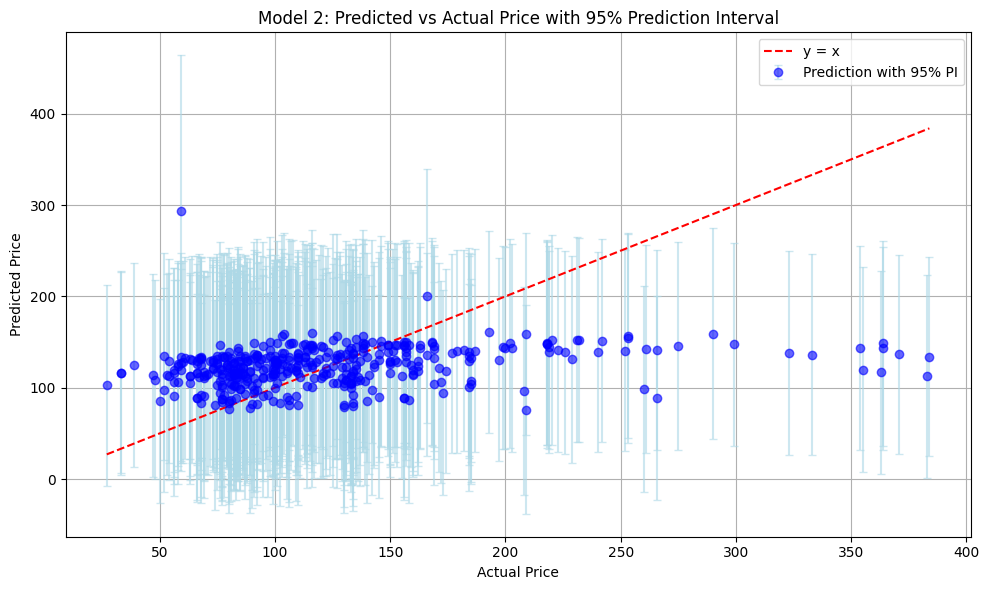

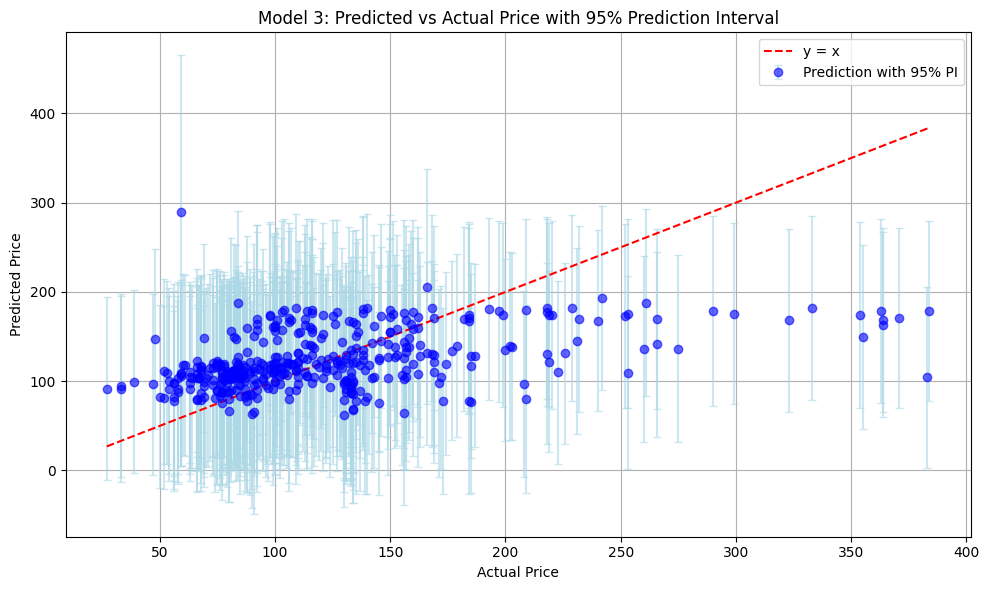

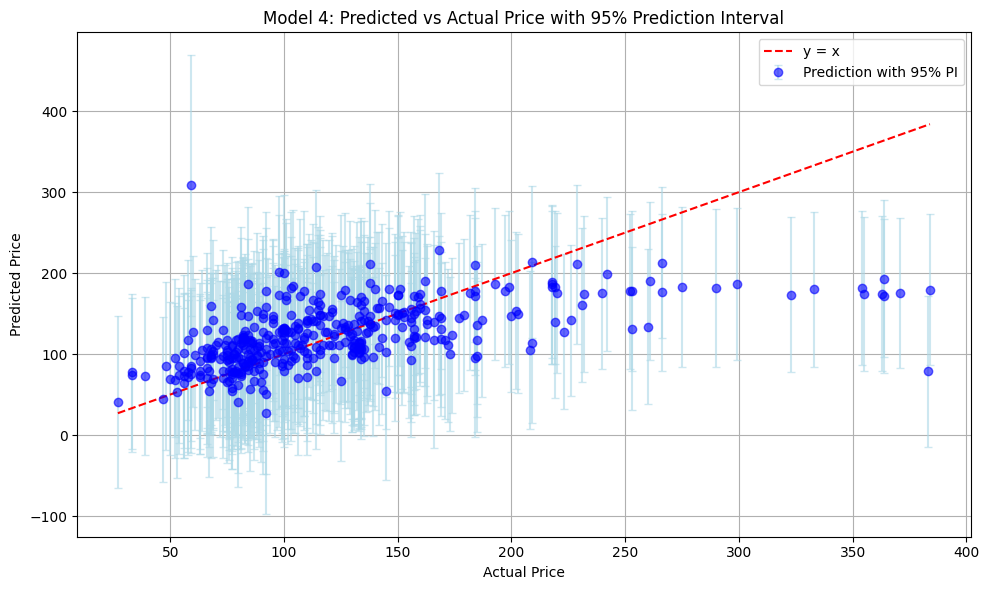

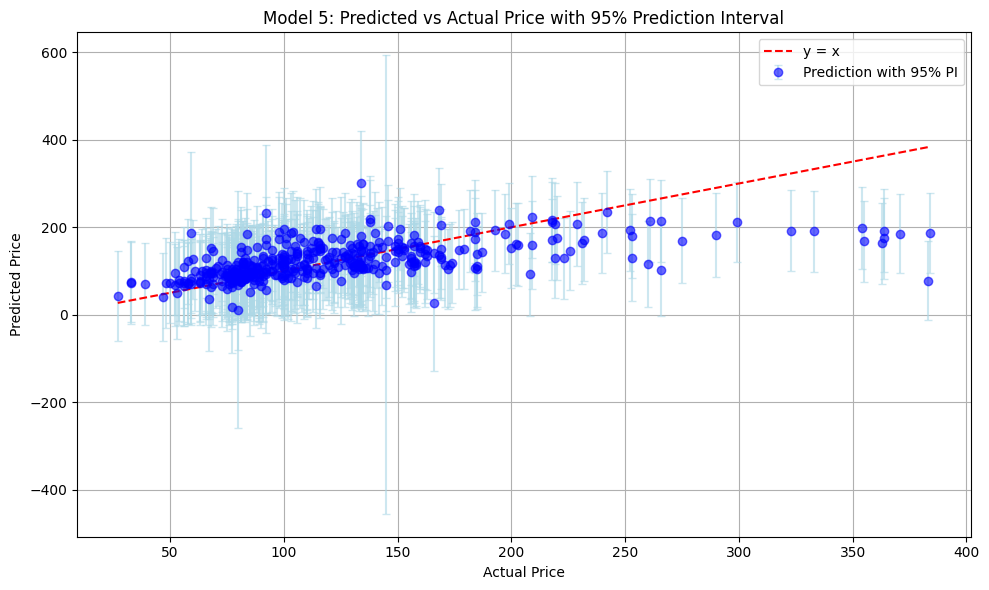

In [ ]:
for i, formula in enumerate(model_equations):
    preds = []
    lowers = []
    uppers = []
    actuals = []

    for train_idx, test_idx in kf.split(hotels):
        train_data = hotels.iloc[train_idx]
        test_data = hotels.iloc[test_idx]

        model = smf.ols(formula, data=train_data).fit()
        pred_result = model.get_prediction(test_data)
        summary_frame = pred_result.summary_frame(alpha=0.05)
        
        preds.extend(summary_frame['mean'])
        lowers.extend(summary_frame['obs_ci_lower'])
        uppers.extend(summary_frame['obs_ci_upper'])
        actuals.extend(test_data['price'])

    plt.figure(figsize=(10, 6))
    plt.errorbar(actuals, preds, 
                 yerr=[np.array(preds) - np.array(lowers), np.array(uppers) - np.array(preds)],
                 fmt='o', color='blue', ecolor='lightblue', alpha=0.6, capsize=3, label='Prediction with 95% PI')
    plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', label='y = x')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f'Model {i+1}: Predicted vs Actual Price with 95% Prediction Interval')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 deg
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.show()

NameError: name 'y_test' is not defined

<Figure size 700x600 with 0 Axes>

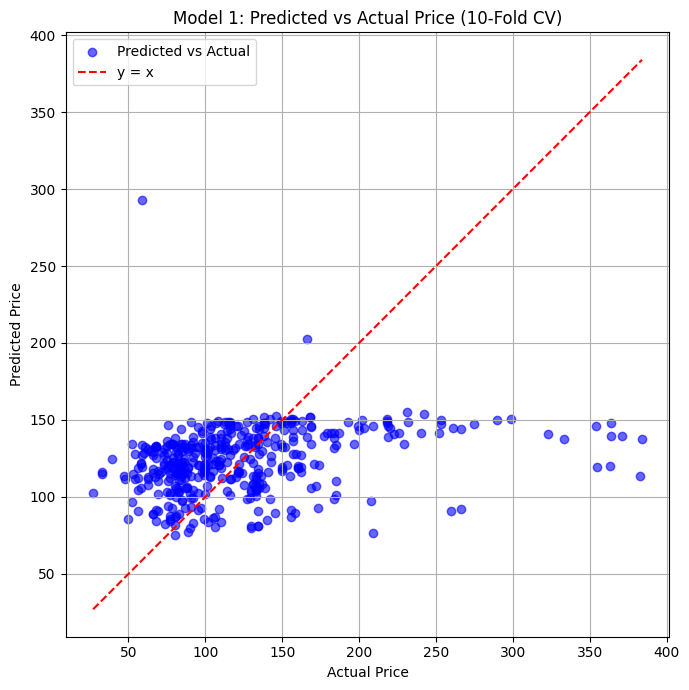

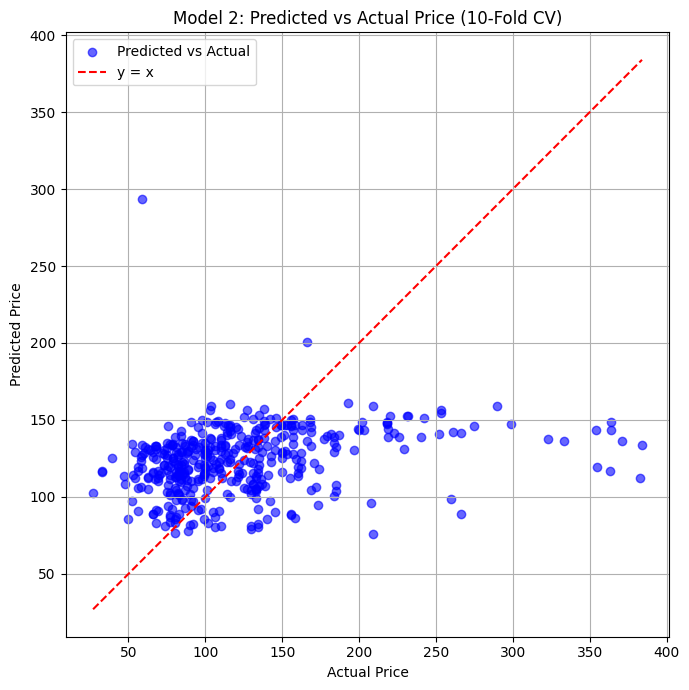

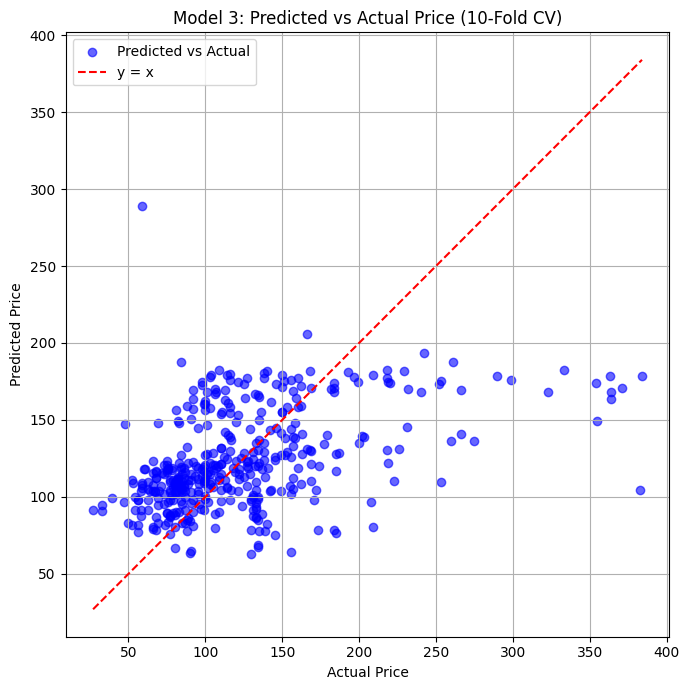

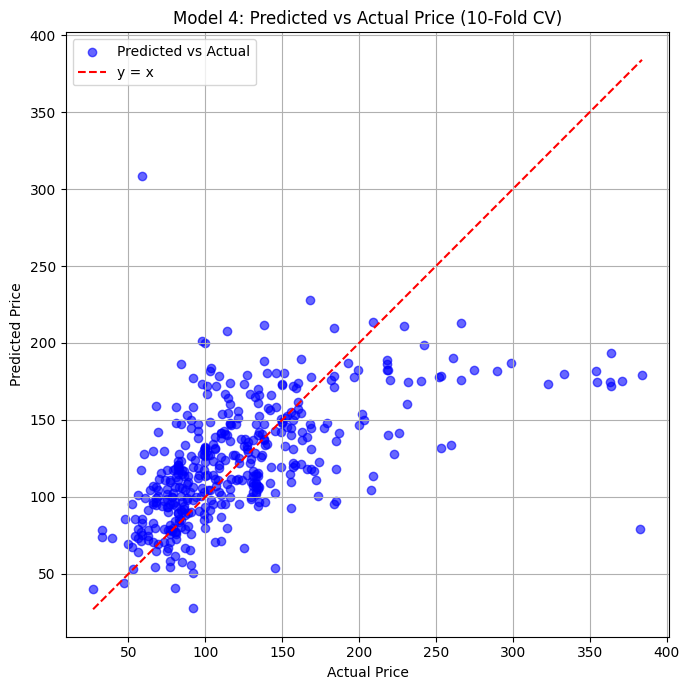

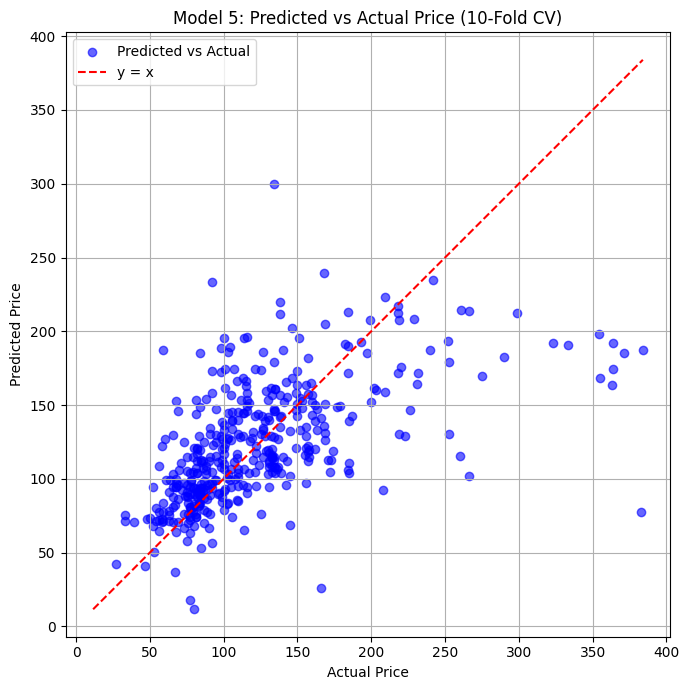

In [84]:
# For each model, plot y_pred vs y_actual (scatter) for all predictions from cross-validation
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)

for i, formula in enumerate(model_equations):
    preds = []
    actuals = []

    for train_idx, test_idx in kf.split(hotels):
        train_data = hotels.iloc[train_idx]
        test_data = hotels.iloc[test_idx]

        model = smf.ols(formula, data=train_data).fit()
        pred_result = model.get_prediction(test_data)
        summary_frame = pred_result.summary_frame(alpha=0.05)
        
        preds.extend(summary_frame['mean'])
        actuals.extend(test_data['price'])

    plt.figure(figsize=(7, 7))
    plt.scatter(actuals, preds, alpha=0.6, color='blue', label='Predicted vs Actual')
    min_val = min(min(actuals), min(preds))
    max_val = max(max(actuals), max(preds))
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Model {i+1}: Predicted vs Actual Price ({k_fold}-Fold CV)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

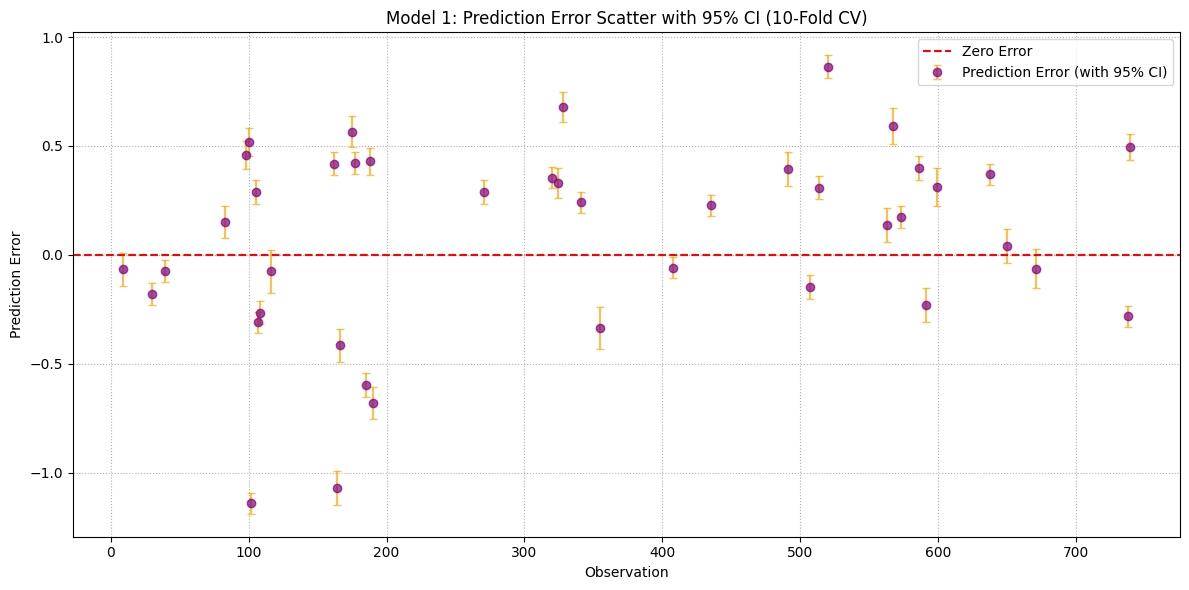

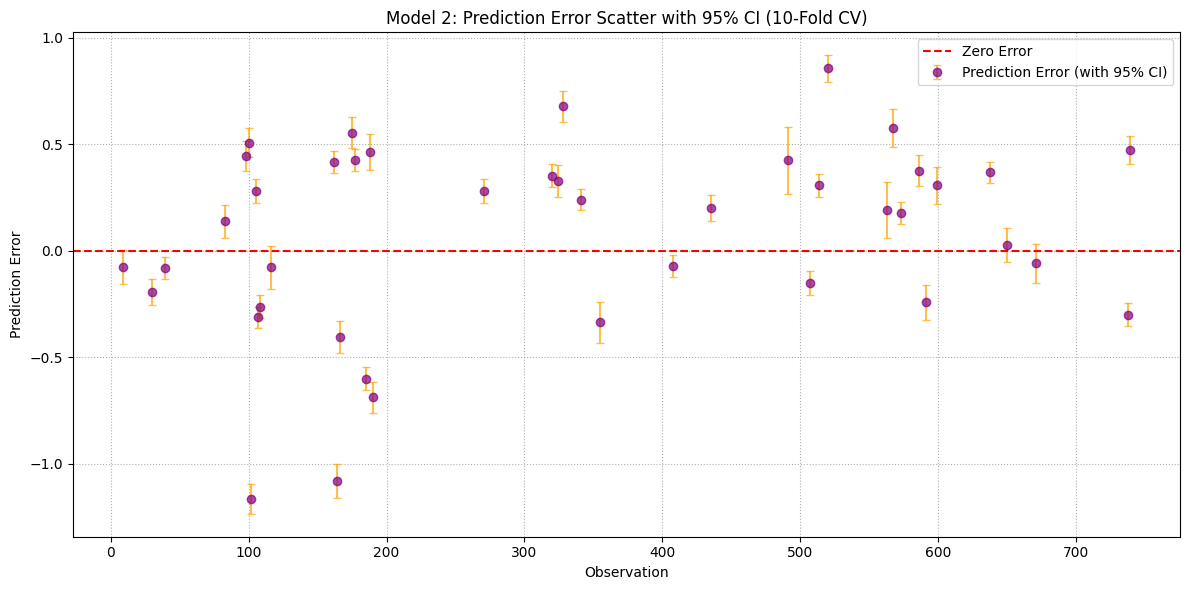

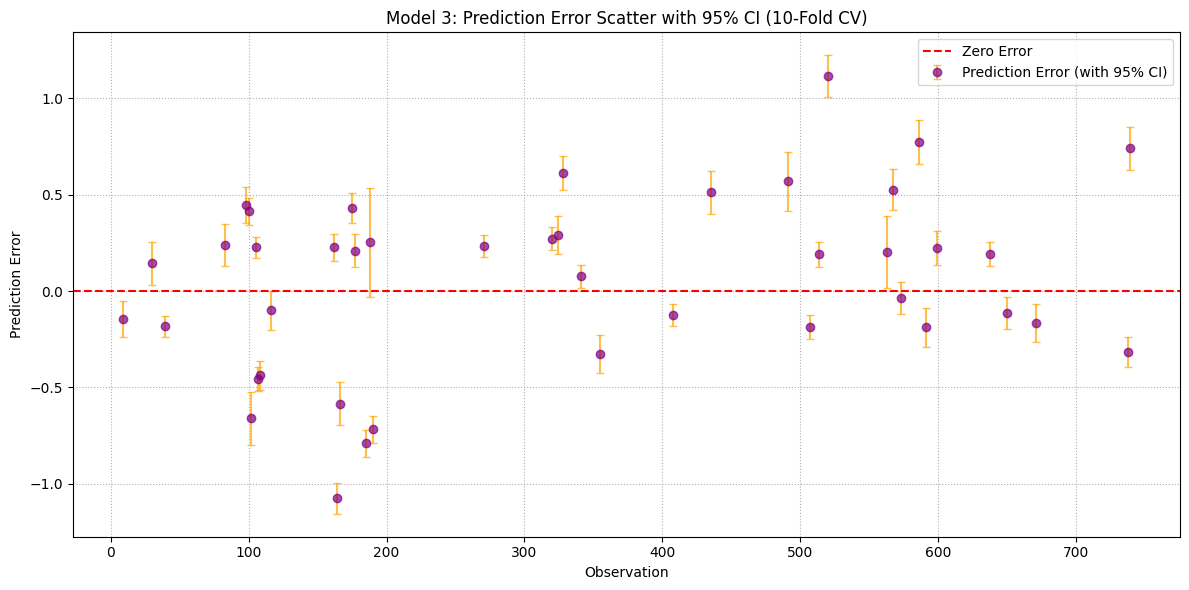

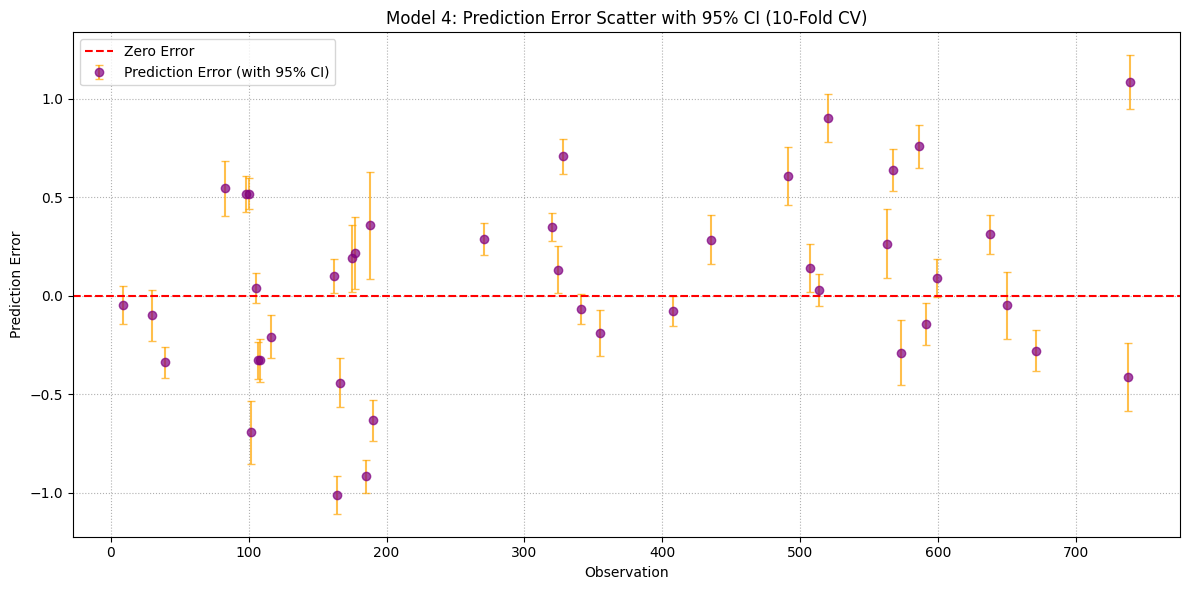

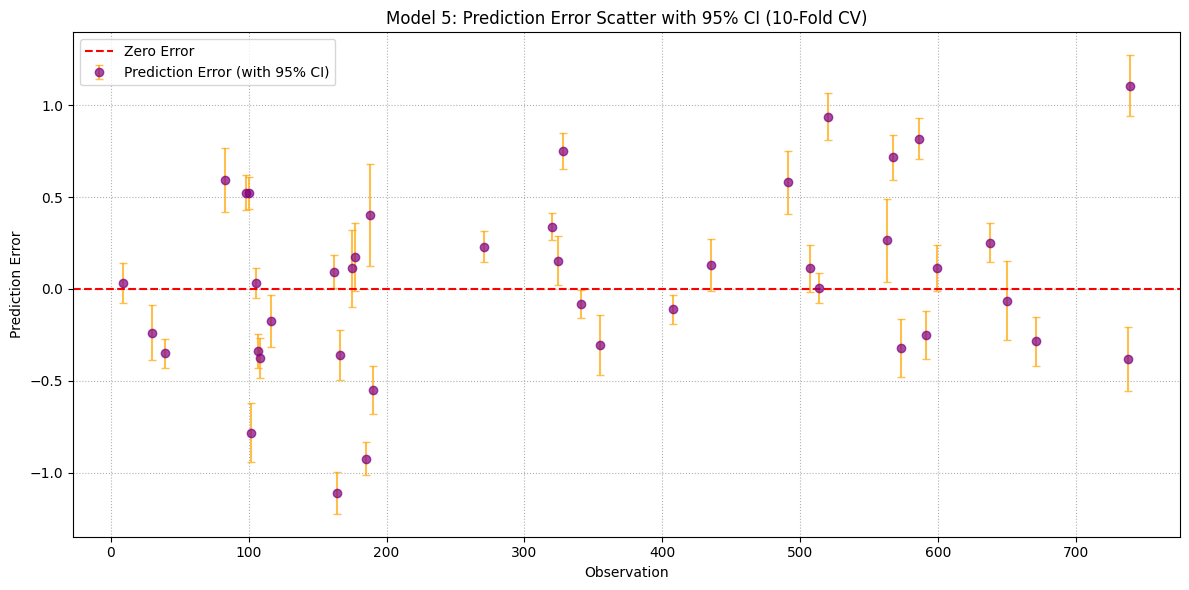

In [91]:
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)
price_mean = hotels['price'].mean()


for i, formula in enumerate(model_equations):
    diffs = []
    lowers = []
    uppers = []

    for train_idx, test_idx in kf.split(hotels):
        train_data = hotels.iloc[train_idx]
        test_data = hotels.iloc[test_idx]

        model = smf.ols(formula, data=train_data).fit()
        pred_result = model.get_prediction(test_data)
        summary_frame = pred_result.summary_frame(alpha=0.05)

        diff = (summary_frame['mean'] - test_data['price'])/price_mean
        lower = (summary_frame['mean_ci_lower'] - test_data['price']) / price_mean
        upper = (summary_frame['mean_ci_upper'] - test_data['price']) / price_mean

        diffs.extend(diff)
        lowers.extend(lower)
        uppers.extend(upper)

    diffs = np.array(diffs)
    lowers = np.array(lowers)
    uppers = np.array(uppers)

    mask = ~np.isnan(diffs) & ~np.isnan(lowers) & ~np.isnan(uppers)
    x = np.arange(len(diffs))[mask]
    y = diffs[mask]
    yerr = np.vstack([np.abs(y - lowers[mask]), np.abs(uppers[mask] - y)])

    plt.figure(figsize=(12, 6))
    plt.errorbar(x, y, yerr=yerr, fmt='o', color='purple', ecolor='orange', alpha=0.7, capsize=3, label='Prediction Error (with 95% CI)')
    plt.axhline(0, color='red', linestyle='--', label='Zero Error')
    plt.title(f'Model {i+1}: Prediction Error Scatter with 95% CI ({k_fold}-Fold CV)')
    plt.xlabel("Observation")
    plt.ylabel("Prediction Error")
    plt.legend()
    plt.grid(True, linestyle=':')
    plt.tight_layout()
    plt.show()


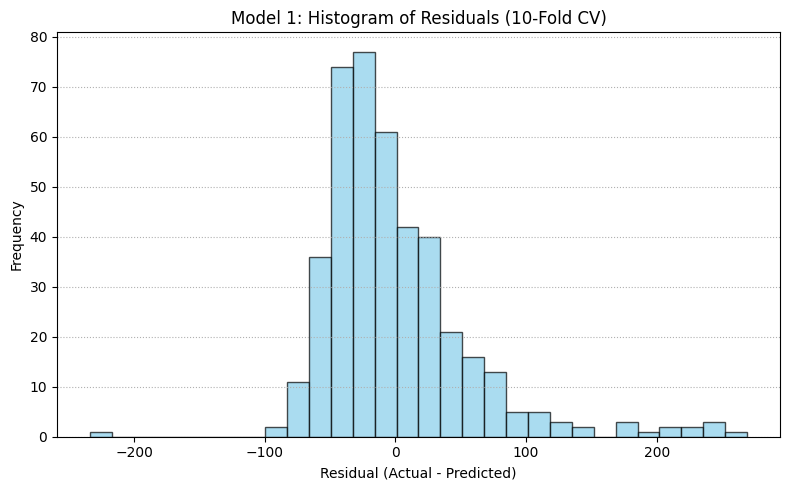

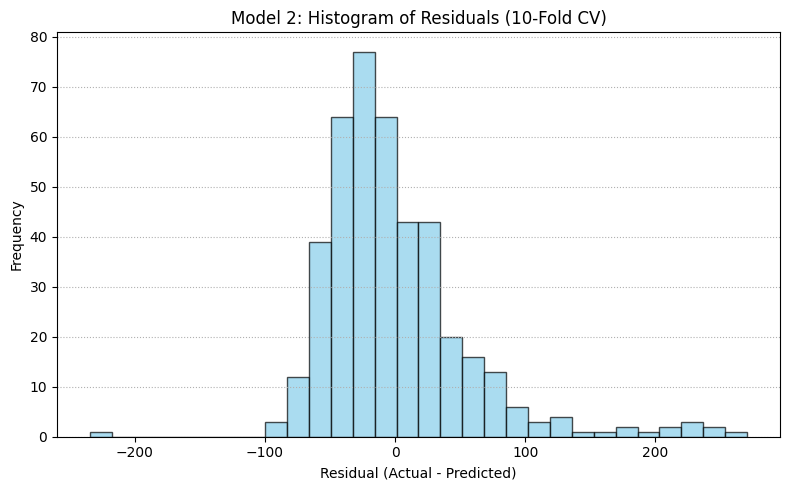

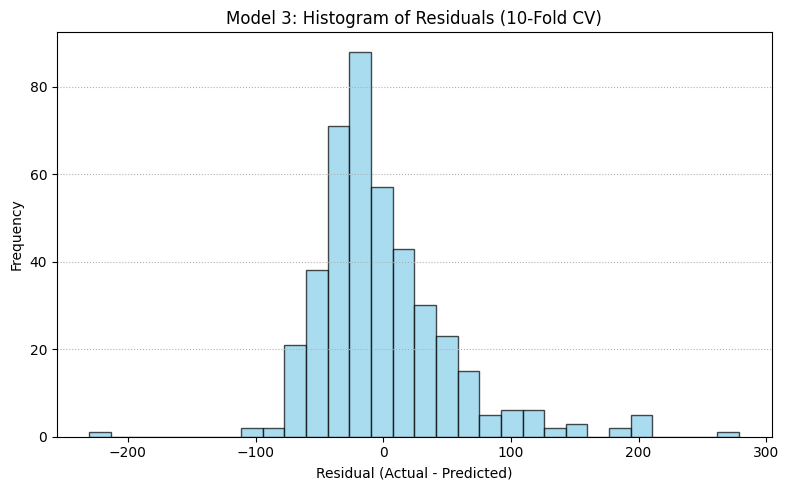

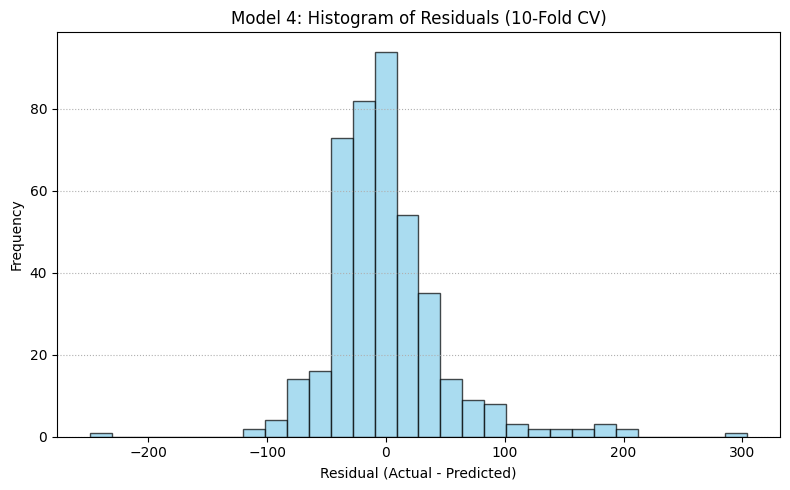

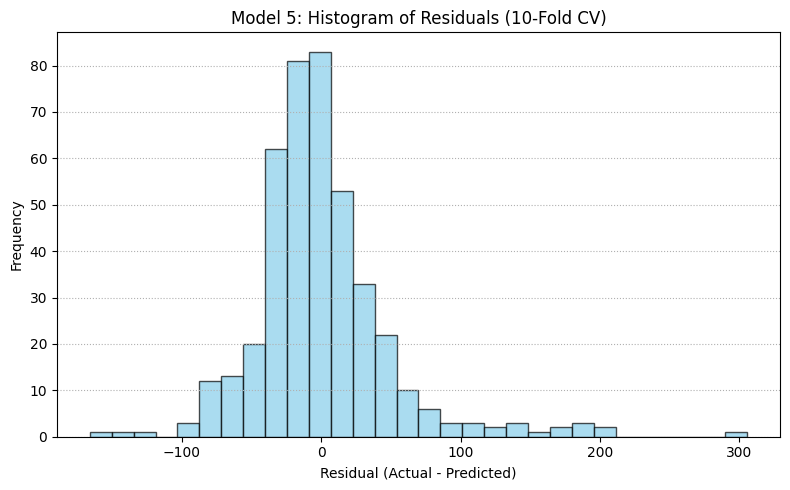

In [95]:
# Plot histogram of residuals for all 5 models using cross-validation
kf = KFold(n_splits=k_fold, shuffle=True, random_state=42)

for i, formula in enumerate(model_equations):
    residuals = []

    for train_idx, test_idx in kf.split(hotels):
        train_data = hotels.iloc[train_idx]
        test_data = hotels.iloc[test_idx]

        model = smf.ols(formula, data=train_data).fit()
        preds = model.predict(test_data)
        res = test_data['price'] - preds
        residuals.extend(res)

    plt.figure(figsize=(8, 5))
    plt.hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Model {i+1}: Histogram of Residuals ({k_fold}-Fold CV)')
    plt.xlabel('Residual (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle=':')
    plt.tight_layout()
    plt.show()

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

metrics = []
for i, formula in enumerate(model_equations):
    model = smf.ols(formula, data=hotels).fit()
    y_true = hotels["price"]
    y_pred = model.fittedvalues

    r2 = r2_score(y_true, y_pred)
    bic = model.bic
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    metrics.append({
        "Model": f"Model {i+1}",
        "R2": r2,
        "BIC": bic,
        "RMSE": rmse,
        "MAE": mae
    })

metrics_df = pd.DataFrame(metrics)
display(metrics_df)

,Model,R2,BIC,RMSE,MAE
0,Model 1,0.102522,4609.292387,56.472336,40.406026
1,Model 2,0.104954,4614.192593,56.395766,40.406664
2,Model 3,0.252068,4562.767305,51.553125,37.412249
3,Model 4,0.370320,4526.568451,47.302454,32.397594
4,Model 5,0.420313,4546.125725,45.385861,30.302705


In [99]:
#R2 evaluation
metrics_df.nlargest(2, 'R2')

,Model,R2,BIC,RMSE,MAE
4,Model 5,0.420313,4546.125725,45.385861,30.302705
3,Model 4,0.370320,4526.568451,47.302454,32.397594


In [100]:
#BIC evaluation
metrics_df.nsmallest(2, 'BIC')

,Model,R2,BIC,RMSE,MAE
3,Model 4,0.370320,4526.568451,47.302454,32.397594
4,Model 5,0.420313,4546.125725,45.385861,30.302705


In [101]:
#RMSE evaluation
metrics_df.nsmallest(2, 'RMSE')

,Model,R2,BIC,RMSE,MAE
4,Model 5,0.420313,4546.125725,45.385861,30.302705
3,Model 4,0.370320,4526.568451,47.302454,32.397594


In [102]:
#MAE evaluation (CV)
metrics_df.nsmallest(2, 'MAE')

,Model,R2,BIC,RMSE,MAE
4,Model 5,0.420313,4546.125725,45.385861,30.302705
3,Model 4,0.370320,4526.568451,47.302454,32.397594
